## Sistemas compatibles determinados

Dado el sistema de ecuaciones lineales:

$$\left \{ \begin{matrix}
a_{11}x_1+a_{12}x_2+\cdots+a_{1n}x_n & = & b_1\\
a_{21}x_1+a_{22}x_2+\cdots+a_{2n}x_n & = & b_2\\
\vdots & \ & \vdots\\
a_{m1}x_1+a_{m2}x_2+\cdots+a_{mn}x_n & = & b_m
\end{matrix} \right .$$

Al pasarla a forma matricial $AX = b$, con la función de numpy **numpy.linalg.solve(A,b)**, siempre que el sistema sea compatible determinado; como parámetros toma en primer lugar la matriz de coeficientes, y en segundo, la matriz de términos independientes.


### Ejemplo 1

Dado el siguiente sistema de ecuaciones lineales, calcula su solución:

$$\left \{ \begin{matrix}
x_1 & + & x_2 & + & 2x_3 & = & 9\\
2x_1 & + & 4x_2 & - & 3x_3 & = & 1\\
3x_1 & + & 6x_2 & - & 5x_3 & = & 0
\end{matrix} \right .$$

In [72]:
import numpy as np
A = np.array([[1,1,2],[2,4,-3],[3,6,-5]])
b = np.array([9,1,0])
AB = np.array([[1,1,2,9],[2,4,-3,1],[3,6,-5,0]])

Habiendo declarado las matrices, comparamos el rango de la matriz de coeficientes y la ampliada, para verificar que el sistema es compatible.

In [73]:
np.linalg.matrix_rank(A) == np.linalg.matrix_rank(AB)

True

Después, será necesario comprobar si el rango es igual al número de incógnitas, para ver si es compatible determinado

In [74]:
np.linalg.matrix_rank(A) == 3

True

Así, podemos dar paso a usar la función **np.linalg.solve(A,b)**

In [75]:
x = np.linalg.solve(A,b)
x

array([1., 2., 3.])

Es decir, la solución es $x = (1,2,3)$

Ahora que obtuvimos el resultado, vamos a comprobar si es correcto. Existen dos formas de hacerlo:

* Sustituir la solución en cada una de las ecuaciones, verificando que se cumpla la igualdad

* Multiplicar la matriz de coeficientes por la matriz solución, y ver si el resultado es la matriz de términos independientes

Debido a la facilidad del segudo caso, usaremos ese. Nuestro sistema se rerpresenta como $AX = b$ 

In [76]:
A.dot(x)

array([9., 1., 0.])

Así, vemos que el resultado es correcto

Por otra parte, numpy no es la única libreria capaz de realizar este tipo de operación. Con la libreria **sympy**

Con esta libreria, podemos darle una solución de 3 formas:

* Introduciendo la lista de ecuaciones 
* Introduciendo la matriz ampliada
* Introduciendo el sistema

### Ejemplo 2

Resolvamos esta vez un sistema de dos ecuaciones con 2 incógnitas:

$$\left \{ \begin{matrix}
2x_1 & + & 2x_2 & = & 1\\
-x_1 & + & x_2 & = & 2
\end{matrix} \right .$$

In [77]:
from sympy import *
from sympy.solvers.solveset import linsolve
x1,x2,x3 = symbols('x1,x2,x3')

La función **symbols()** consiste en crear variables para manejarlas en una ecuación. Acepta un string con las variables a considerar, separados por coma

#### Introduciendo la lista de ecuaciones

Para introducir una lista de ecuaciones en la función **linsolve()**, primero tenemos que transformarlas de modo que todos están igualadas a 0, por lo que el sistema equivalente sería:

$$\left \{ \begin{matrix}
2x_1 & + & 2x_2 & - & 1 & = & 0\\
-x_1 & + & x_2 & - & 2 & = & 0 
\end{matrix} \right .$$

Por tanto, introducimos lo siguiente

In [78]:
linsolve([2*x1 + 2*x2 - 1, -x1 + x2 - 2], (x1,x2))

{(-3/4, 5/4)}

#### Introduciendo la matriz ampliada

Si lo queremos resolver introduciendo la matriz ampliada

In [79]:
linsolve(Matrix(([2,2,1],[-1,1,2])), (x1, x2))

{(-3/4, 5/4)}

#### Introduciendo el sistema

Para hacerlo introduciendo el sistema, primero debemos de declararlo para después pasarlo como parámetro

In [80]:
AB = Matrix(((2,2,1),(-1,1,2)))
A = AB[:,:-1] # Todas las filas, y todas las columnas excepto la última
b = AB[:,-1] # Todas las filas, y la última columna```
system = A,b # Esto es solo juntar dos variables
linsolve(system, x1, x2)

{(-3/4, 5/4)}

## Representación de sistemas en python

Gracias a la librería **matplotlib**, es posible representar sistemas de ecuaciones lineales de manera gráfica. 

In [81]:
import matplotlib.pyplot as plt
import numpy as np

Dado el sistema de ecuaciones lineales de 2 ecuaciones y 2 incógnitas presentado en el ejemplo 2 

$$\left \{ \begin{matrix}
2x_1 & + & 2x_2 & = & 1\\
-x_1 & + & x_2 & = & 2
\end{matrix} \right .$$

Reescribiendo el sistema, aislando la variable $x_2$

$$\left \{ \begin{matrix}
x_2 & = & ^1/_2 & - & x_1\\
x_2 & = & 2 & + & x_1
\end{matrix} \right .$$

Su representación gráfica se dará con la siguiente función

(-2, 2)

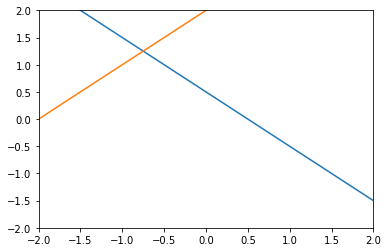

In [82]:
x1 = np.linspace(-2,2,10)
plt.plot(x1, 1/2-x1, x1, 2+x1)
plt.xlim((-2,2))
plt.ylim((-2,2))

Donde:

* Gracias a la función **np.linspace()** damos 10 valores entre -2 y 2 a la variable
* El eje horizontal representa la variable x1
* El eje vertical representa la varaible x2
* Claramente se observa que el sistema es compatible determinado, debido a la única intersección presente de ambas rectas
* El punto de intersección es la solución previa dada en el ejemplo 2. $\big ( -\frac{3}{4} + \frac{5}{4} \big )$

### Ejemplo 3

$$\left \{ \begin{matrix}
4x & + & 2y & = & 3\\
x & - & 2y & = & 2\\
3x & + & 4y & = & 1
\end{matrix} \right .$$

Si lo reescribirmos de la forma:

$$\left \{ \begin{matrix}
y & = & \frac{3}{2} - 2x\\
y & = & \frac{x}{2} - 1\\
y & = & \frac{1 - 3x}{4}
\end{matrix} \right .$$

El siguiente código genera el siguiente gráfico

(-5, 5)

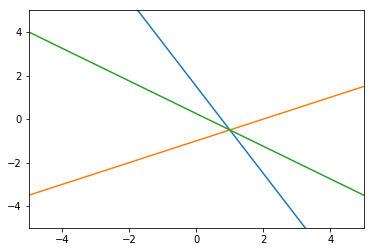

In [83]:
x = np.linspace(-6,6,10)
plt.plot(x, 3/2 - 2*x, x, x/2 - 1, x, (1-3*x)/4)
plt.xlim(-5,5)
plt.ylim(-5,5)

Donde: 

* El eje horizontal representa la variable x
* El eje vertical representa la variable y
* Es visible que el sistema es compatible determinado debido a que existe un punto de intersección para las 3 rectas


### Ejemplo 1

Si quisieramos representar un sistema de 3 incógnitas, como el siguiente caso visto en el ejemplo 1, se complica la cosa. Añadiendo que el esqueña no es interactivo

$$\left \{ \begin{matrix}
x & + & y & + & 2z & = & 9\\
2x & + & 4y & - & 3z & = & 1\\
3x & + & 6y & - & 5z & = & 0
\end{matrix} \right .$$

In [84]:
from mpl_toolkits.mplot3d import Axes3D # Esta función hace dibujos en 3D, la librería es para gráficos 3D

point1 = np.array([0,0,9/2])
n1 = np.array([1,1,2])

point2 = np.array([0,0,-1/3])
n2 = np.array([2,4,-3])

point3 = np.array([0,0,0])
n3 = np.array([3,6,-5])

En la celda anterior, lo único que se ha realizado es la declaración de un punto que haga cumplir cada ecuación y el vector nomral del plano que forma dicha ecuación

Es decir,

* **point1**$= \big(0,0,\frac{9}{2} \big)$ cumple la primera ecuación ya que

$$0 + 0 + 2 \cdot \frac{9}{2} = 9$$

* **point2**$= \big(0,0,-\frac{1}{3} \big)$ cumple la segunda ecuación ya que

$$0 + 0 - 3 \cdot -\frac{1}{3} = 1$$

* **point3**$= \big(0,0,0 \big)$ cumple la tercera ecuación ya que

$$0 + 0 + 0 = 0$$

Los puntos anteriores, no son los únicos valores que podemos tomar, también sirben los siguientes

* point1 $= (9,0,0)$
* point2 $= (^1/_2,0,0)$
* point3$= (-2,1,0)$

Aquí se presenta el ejercicio 1

Por otro lado, los puntos normales mencionados se definen como:

$\color{blue}{\text{Vector normal.}}$ El vector $\vec{n} = (a,b,c)$ es normal a un plano si es perpendicular a éste

Sin embargo, más nos interesa es que dada la ecuación general de un plano: $Ax + By + Cz + D = 0$, el vector normal a este plano es $\vec{n} = (a,b,c)$

![Vector normal al plano $Ax + By + Cz + D = 0$](images/ejemploVectorNormal.png)

Por ese motivo, los vectores normales de cada una de las ecuaciones

$$\left \{ \begin{matrix}
x & + & y & + & 2z & - & 9 & = & 0\\
2x & + & 4y & - & 3z & - & 1 & = & 0\\
3x & + & 6y & - & 5z & = & 0
\end{matrix} \right .$$

son

$$n_1 = (1,1,2), \quad n_2 = (2,4,-3), \quad n_3 = (3,6,-5)$$

Con un punto encima de cada plano y el vector normal al mismo, nos falta declarar los términos independientes

In [85]:
D1 = -9
D2 = -1
D3 = 0

Se daclaran los valores de D, los términos independientes, para cada una de las ecuaciones, los cuales recordemos vienen dados por la ecuación general del plano: $Ax + By + Cz + D = 0$

Ahora tenemos lo necesario para representar el sistema de forma gráfica, sin embargo, como hicimos en los demás casos, tenemos que suministrar una serie de valores. En lugar de hacerlo con la función **np.linspace()** que declara todo un conjunto de elementos de forma lineal, necesitamos una matriz de coordenadas para nuestro plano, por lo que usaremos la función **np.meshgrid()**

In [86]:
X, Y = np.meshgrid(range(30),range(30))

Ahora, es necesario definir $z$ en función a las variables $x$ y $y$. Para dicho fin, es necesario aislar a $z$ en cada una de las ecuaciones. Al haber realizado esto, el sistema quedaría representado de la siguiente forma.

$$\left \{ \begin{matrix}
z & = & \frac{9-x-y}{2}\\
z & = & \frac{2x+4y-1}{3}\\
z & = & \frac{3x+6y}{5}
\end{matrix} \right .$$

Al observar este sistema, nos damos cuenta que a la hora de definir $z$, existe una fórmula útil para ello

$$z = \frac{-Ax-By-D}{C}$$

Por lo tanto, en función de lo anterior, definimos las siguientes 3 variables

In [87]:
z1 = (-n1[0]*X - n1[1]*Y - D1)*1./n1[2]
z2 = (-n2[0]*X - n2[1]*Y - D2)*1./n2[2]
z3 = (-n3[0]*X - n3[1]*Y - D3)*1./n3[2]

El valor de $z$ puede representar la altura de un punto del plano formado por las ecuaciones.

Una vez hecho, solo es cuestión de hacer uso de la librería para dibujar gráficos

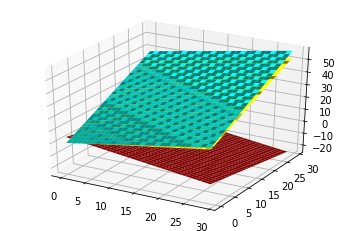

In [88]:
plot3d = plt.figure().gca(projection='3d') # Creamos una variable que contendra el gráfico en 3d
plot3d.plot_surface(X, Y, z1, color = 'red') 
# Con el método plot_surface() dibujamos un plano dándole los conjuntos de datos X, Y, y las variables z,
# Así como definimos el color del plano.
plot3d.plot_surface(X, Y, z2, color = 'cyan')
plot3d.plot_surface(X, Y, z3, color = 'yellow')
plt.show()

## Sistemas compatibles indeterminados

Antes que nada, haremos uso de la función **np.linalg.matrix_rank()** con el fin de realizar lel Teorema de Rouché-Frobenius.

### Ejemplo 4

$$\left \{ \begin{matrix}
x & + & y & - & z & = & 2\\
x & - & y & + & z & = & 1\\
3x & + & y & - & z & = & 5
\end{matrix} \right .$$

Definimos las matrices del sistema

In [89]:
A = np.array([[1,1,-1],[1,-1,1],[3,1,-1]])
B = np.array([2,1,5])
AB = np.array([[1,1,-1,2],[1,-1,1,1],[3,1,-1,5]])

Procedemos a calcular y comparar los rangos de las matrices A y la ampliada

In [90]:
np.linalg.matrix_rank(A)

2

In [91]:
np.linalg.matrix_rank(A) == np.linalg.matrix_rank(AB)

True

Observamos que el sistema es compatible, sin embargo el rango es menor al número de incógnitas, de manera que es un sistema indeterminado

En caso de querer representar de manera gráfica el sistema, introducimos el siguiente código

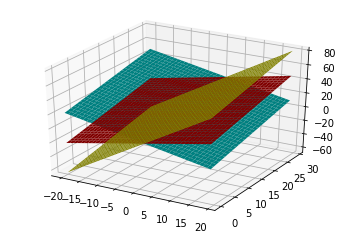

In [92]:
# Puntos y vectores normales
point1 = np.array([0,0,-2])
n1 = np.array([1,1,-1])

point2 = np.array([0,0,1])
n2 = np.array([1,-1,1])

point3 = np.array([0,0,-5])
n3 = np.array([3,1,-1])

# Términos independientes
D1 = -2
D2 = -1
D3 = -5

# Creamos la matriz de coordenadas
X, Y = np.meshgrid(range(-20,20), range(30))

# Calculamos los valores de la variable z en cada ecuación de acuerdo a la fórmula
z1 = (-n1[0]*X - n1[1]*Y - D1)*1./n1[2]
z2 = (-n2[0]*X - n2[1]*Y - D2)*1./n2[2]
z3 = (-n3[0]*X - n3[1]*Y - D3)*1./n3[2]

# Ahora creamos y dibujamos la gráfica
plot3d = plt.figure().gca(projection='3d')
plot3d.plot_surface(X,Y,z1, color='red')
plot3d.plot_surface(X,Y,z2, color='cyan')
plot3d.plot_surface(X,Y,z3, color='yellow')
plt.show()

Como es el caso de los sistemas compatibles determinados, aquellos sistemas indeterminados también pueden hacer uso de la función **linsolve** de la libreria **simpy**

Recuperando el ejemplo 4 anteriormente mostrado

$$\left \{ \begin{matrix}
x & + & y & - & z & = & 2\\
x & - & y & + & z & = & 1\\
3x & + & y & - & z & = & 5
\end{matrix} \right .$$

Queremos obtener su resultado. No olvidemos, que se trata de un sistema de 3 ecuaciones y 3 incógnitas

#### Introduciendo una lista de ecuaciones

Para introducir este tipo de parámetro, es necesario que las ecuaciones estén igualadas a 0. Consideramos el siguiente esquema equivalente

$$\left \{ \begin{matrix}
x & + & y & - & z & - & 2 & = & 0\\
x & - & y & + & z & - & 1 & = & 0\\
3x & + & y & - & z & - & 5 & = & 0
\end{matrix} \right .$$

In [93]:
from sympy import *
from sympy.solvers.solveset import linsolve
x,y,z = symbols('x,y,z')

linsolve([x+y-z-2, x-y+z-1, 3*x+y-z-5], (x,y,z))

{(3/2, z + 1/2, z)}

#### Introduciendo la matriz ampliada

Esto se realiza de la siguiiente forma

In [94]:
linsolve(Matrix(([1,1,-1,2], [1,-1,1,1], [3,1,-1,5])), (x,y,z))

{(3/2, z + 1/2, z)}

#### Introduciendo el sistema

Para este caso, tenemos que declarar el sistema con el que estamos trabajando

In [95]:
AB = Matrix(((1,1,-1,2), (1,-1,1,1), (3,1,-1,5)))
A = AB[:,:-1]
b = AB[:,-1]
system = A, b
linsolve(system, x, y, z)

{(3/2, z + 1/2, z)}

## Sistemas incompatibles

Para este apartado trataremos de resolver en python un sistema incompatible. Para ello, primero probaremos que el siguiente ejemplo es un sistema incompatible

### Ejemplo 5

$$\left \{ \begin{matrix}
x & + & y & = & 2\\
x & - & y & = & 1\\
2x & + & y & = & 3
\end{matrix} \right .$$

Probamos con base en el Teorema de Rouché-Frobenius qué el sistema es incompatible.

In [96]:
A = np.array([[1,1], [1,-1], [2,1]])
B = np.array([2,1,3])
AB = np.array([[1,1,2], [1,-1,1], [2,1,3]])

In [97]:
# Comparamos el rango de la matriz A y la matriz ampliada
np.linalg.matrix_rank(A) == np.linalg.matrix_rank(AB)

False

Como vemos el rango de ambas matrices no es el mismo, y por lo tanto el sistema es incompatible.

Para visualizarlo mejor, dibujaremos las ecuaciones de la recta localizadas en el sistema.

Primero despejamos la segunda variable, en este caso $y$ para obtener una ecuación de la recta

$$\left \{ \begin{matrix}
y & = & 2 & - & x\\
y & = & x & - & 1\\
y & = & 3 & - & 2x
\end{matrix} \right .$$

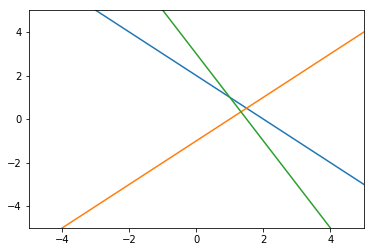

In [98]:
x = np.linspace(-5,5,10)
plt.plot(x, 2-x, x, x-1, x, 3-2*x)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

En la gráfica de las 3 rectas, observamos que existen 3 punto de intersección, de manera que podemos decir que para cada par de ecuaciones existe una solución. Sin embargo ninguno de los puntos es aquel en donde intersectan las 3 rectas, por lo que concluimos que el sistema es incompatible

Además, es posbile usar la función **linsolve()** de **sympy**, con cualquiera de los 3 parámetros posibles

#### Introduciendo la lista de ecuaciones

$$\left \{ \begin{matrix}
x & + & y & - & 2 & = & 0\\
x & - & y & - & 1 & = & 0\\
2x & + & y & - & 3 & = & 0
\end{matrix} \right .$$

In [99]:
x, y = symbols('x,y')
linsolve([x+y-2, x-y-1, 2*x+y-3], (x,y))

EmptySet()

#### Introduciendo la matriz ampliada

In [100]:
linsolve(Matrix(([1,1,2], [1,-1,1], [2,1,3])), (x,y))

EmptySet()

#### Introduciendo el sistema

In [101]:
AB = Matrix(((1,1,2), (1,-1,1), (2,1,3)))
A = AB[:,:-1]
B = AB[:,-1]
system = A, B
linsolve(system, x, y)

EmptySet()